# Maxima.jl のインストールの仕方 (Windows編)

黒木玄

2018-01-03, 2019-06-08, 2019-12-27, 2021-11-09

Old Version: https://nbviewer.org/gist/genkuroki/6d32a79a04770dc63d366c2f1a0d61a4

(0) 以下にアクセスして色々読む.

https://github.com/nsmith5/Maxima.jl

https://nsmith5.github.io/Maxima.jl/latest/

(1) Maxima のバイナリをインストールする.

https://sourceforge.net/projects/maxima/files/Maxima-Windows/

注意 2019-12-27：これを書いている時点の最新版 maxima-clisp-sbcl-5.41.0a-win64.exe をインストールすると gnuplot で作画できなくなる. それより少し古い maxima-clisp-sbcl-5.38.1.exe であれば gnuplot で作画可能である.

注意 2021-11-09: maxima-5.45.1s-win64.exe をダウンロードしてこのノートブックを正常に実行できている。

(2) Maximaがインストールされているディレクトリ以下を探して maxima.bat を見付け, maxima.bat がおいてあるディレクトリを環境変数 PATH に追加する.

(3) julia で

```julia
run('maxima')
```

を実行して, julia から maxima.bat が起動できることを確認する.

(4) julia で以下を実行する.

```julia
using Pkg
Pkg.add("Maxima")
```

(5) 以下を実行できるかを確認する:

```julia
using Maxima
a = m"sin(%pi/3)"
b = integrate(m"log(sin(x))", 'x')
c = integrate(m"x*log(sin(x))", 'x')
```

Windows が「アクセスを許可してよいか？」のような意味の警告を発して来た場合には「許可」するように答える.

In [1]:
using Maxima

# function Base.show(io::IO, ::MIME"text/latex", m::MExpr)
#     check = "'(" * replace(convert(String, m), r";" => ")\$\n'(") * ")"
#     write(Maxima.ms.input, "$check\$\n print(ascii(4))\$")
#     out = (readuntil(Maxima.ms.output, Maxima.EOT) |> String
#                                      |> str -> rstrip(str, Maxima.EOT))
#     if occursin(Maxima.synerr, out) || occursin(Maxima.maxerr, out)
#         @warn "Invalid Maxima expression"
#         print(io, out)
#     else
#         write(Maxima.ms, "tex('("*replace(convert(String, m), r";" => "))\$\ntex('(") * "))")
#         texstr = read(Maxima.ms)
#         texstr = replace(texstr, "\r"=>"")
#         print(io, replace(texstr, r"\nfalse\n" => ""))
#     end
# end

In [2]:
a = m"sin(%pi/3)";
display(a)

 
                                    sqrt(3)
                                    -------
                                       2

In [3]:
b = integrate(m"log(sin(x))", 'x');
display(b)

 
                           2         2
 x log(sin(x)) - (x log(sin (x) + cos (x) + 2 cos(x) + 1)
            2         2
 + x log(sin (x) + cos (x) - 2 cos(x) + 1) + 2 %i x atan2(sin(x), cos(x) + 1)
                                                 %i x                 %i x
 - 2 %i x atan2(sin(x), 1 - cos(x)) - 2 %i li (%e    ) - 2 %i li (- %e    )
                                             2                  2
       2
 - %i x )/2

In [4]:
c = integrate(m"x*log(sin(x))", 'x');
display(c)

 
  2
 x  log(sin(x))       2        2         2
 -------------- - (3 x  log(sin (x) + cos (x) + 2 cos(x) + 1)
       2
      2        2         2
 + 3 x  log(sin (x) + cos (x) - 2 cos(x) + 1)
         2                                   2
 + 6 %i x  atan2(sin(x), cos(x) + 1) - 6 %i x  atan2(sin(x), 1 - cos(x))
            %i x                  %i x               %i x
 + 12 li (%e    ) - 12 %i x li (%e    ) + 12 li (- %e    )
        3                     2                3
                   %i x          3
 - 12 %i x li (- %e    ) - 2 %i x )/12
             2

In [5]:
d = factor(MExpr("a^2 - b^2"));
display(d)

 
                                (a - b) (b + a)

In [6]:
A = diff(m"log(f(x))", 'x', 4);
display(A)

 
  4                           3                2
 d               d           d                d          2
 --- (f(x))   4 (-- (f(x))) (--- (f(x)))   3 (--- (f(x)))
   4             dx            3                2
 dx                          dx               dx
 ---------- - -------------------------- - ---------------
    f(x)                 2                       2
                        f (x)                   f (x)
                                                    2
                                      d         2  d
                                  12 (-- (f(x)))  (--- (f(x)))      d         4
                                      dx             2           6 (-- (f(x)))
                                                   dx               dx
                                + ---------------------------- - --------------
                                              3                       4
                                             f (x)                   f (x)

In [7]:
B = integrate(m"log(sin(x))", 'x', m"0", m"%pi/2");
display(B)

 
                                                            2
       8 %i li (%i) + 8 %i li (- %i) - 4 %pi log(2) + %i %pi          2
              2              2                                  %i %pi
       ------------------------------------------------------ - -------
                                 8                                12

In [8]:
C = integrate(m"1/sqrt(1+x+x^2)", 'x');
display(C)

 
                                      2 x + 1
                                asinh(-------)
                                      sqrt(3)

In [9]:
# gnuplot が立ち上がる
plot2d(m"sin(x)", x=(-4,4), title="Sine Wave")

In [10]:
# gnuplot が立ち上がる
plot3d(
m"[5*cos(x)*(cos(x/2)*cos(y)+sin(x/2)*sin(2*y)+3.0)-10.0,
-5*sin(x)*(cos(x/2)*cos(y)+sin(x/2)*sin(2*y)+3.0),
5*(-sin(x/2)*cos(y)+cos(x/2)*sin(2*y))], [x, -%pi, %pi], [y, -%pi, %pi]")


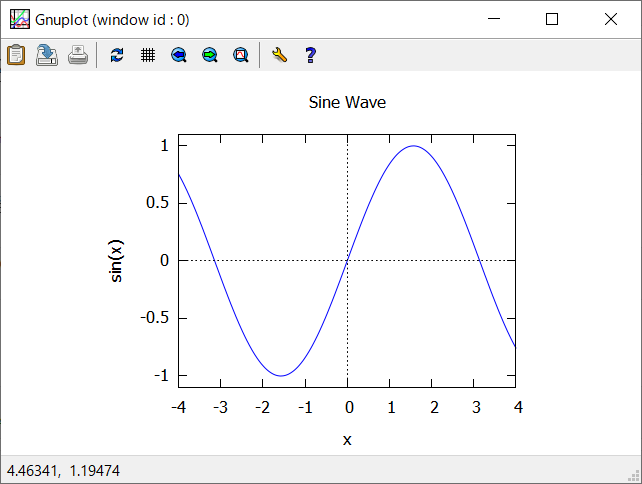


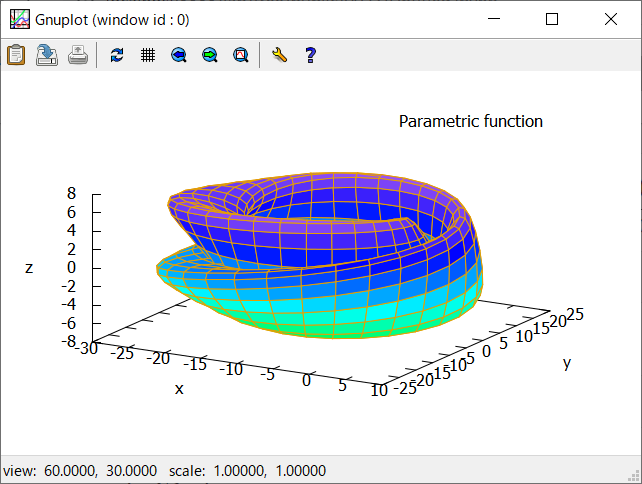

In [11]:
using Base64
showimg(mime, fn; tag="img") = open(fn) do f
    base64 = base64encode(f)
    display("text/html", """<$tag src="data:$mime;base64,$base64" />""")
end

showimg("image/png", "2021-11-09_00.png")
showimg("image/png", "2021-11-09_01.png")